# Lecture 13
<!-- ToC -->

-Introduction: [>>](#Introduction)  
-Propagating errors: [>>](#Propagating-errors)  
-Fitting by minimising chi squared: [>>](#Fitting-by-minimising-chi-squared)  
-Electron diffraction experiment: [>>](#Electron-diffraction-experiment)  
--Electron diffraction apparatus: [>>](#Electron-diffraction-apparatus)  
--Measuring the diffraction rings at variable electron momentum: [>>](#Measuring-the-diffraction-rings-at-variable-electron-momentum)  
-Results: [>>](#Results)  
-More plots: [>>](#More-plots)  
--Lines: [>>](#Lines)  
--Points with errorbars: [>>](#Points-with-errorbars)  
--Histograms (with mean and standard deviation): [>>](#Histograms-(with-mean-and-standard-deviation))  
--Multiple plots in one figure: [>>](#Multiple-plots-in-one-figure)  

## Introduction

This week we will remind ourselves how to propagate errors and look again at fitting and plotting data. As an example of how to do a fit (and some plots!), we will use results from an experiment to measure Planck's constant. We will then look at a few additional plots.

## Propagating errors

Supposing we have measured $x$ and $y$, and their errors, $\delta x$ and $\delta y$. We now want to use these to calculate another quantity, $z = z(x, y).$ What is the error on $z$? 

The variation in $z$ for a small change in $x$ is:

$$\delta z = \frac{\partial z}{\partial x} \delta x.$$

Similarly, the change in $z$ for a small variation in $y$ is:

$$\delta z = \frac{\partial z}{\partial y} \delta y.$$

Assuming that $x$ and $y$ are independent, the total variation in $z$ resulting from changes in both $x$ and $y$ is then:

$$\delta z = \sqrt{ \left( \frac{\partial z}{\partial x} \delta x \right)^2 + \left( \frac{\partial z}{\partial y} \delta y \right)^2 }.$$

All the rules you see about calculating errors (e.g. in the case that $z = ax + by$ or $z = kxy$) are derived using this expression.

## Fitting by minimising chi squared

Here, we look at fitting a straight line $y = mx + c$ to a set of data points$(x_i, y_i)$, with $i = 1 \dots N$. 
The separation between the line and the data point $(x_i, y_i)$ is given by:

\begin{align}
s_i &= y_i - y(x_i) \\
       &= y_i - (mx_i + c).
\end{align}

If we want to find the values of $m$ and $c$ which ensure the line is as close as possible to the points, taking into account the errors involved, we want to minimise something like 

$$\frac {s_i}{\delta s_i},$$

for all the data points. This means that large separations are "allowed" if the error involved is large, but not if the error is small, so well constrained points are more significant than poorly constrained ones.

The total error on $s_i$ is:

\begin{align}
\delta s_i &= \sqrt{ \left( \frac{\partial s_i}{\partial y_i} \delta y_i \right)^2 + 
                   \left( \frac{\partial s_i}{\partial x} \delta x_i \right)^2} \\
         &= \sqrt{ (\delta y_i)^2 + (m \delta x_i)^2}.
\end{align}

So we want to minimise something like

$$\chi_i = \left| \frac {y_i - (mx_i + c)}{\sqrt{ (\delta y_i)^2 + (m \delta x_i)^2}} \right|$$

for all $N$ data points.

Many fit programs minimise a closely related quantity defined by:

\begin{align}
\sum_{i = 1}^N \chi_i^2 &= \sum_{i = 1}^N \left( \frac {y_i - (mx_i + c)}{\sqrt{ (\delta y_i)^2 + (m \delta x_i)^2}} \right)^2\\
                         &= \sum_{i = 1}^N \frac {\left( y_i - (mx_i + c)\right)^2}{(\delta y_i)^2 + (m \delta x_i)^2}. 
\end{align}

More complicated fitting functions lead to more complicated expressions for $\chi_i$, but the principle remains the same!

## Electron diffraction experiment

The electron is a fundamental particle which was discovered in 1897 by J.J. Thompson. Its discovery marked the first step in particle physics and was a key stepping stone in the development of quantum theory. One of the prediction of quantum theory is that particles may act like waves. According to de-Broglie’s equation, an electron can be assigned a wavelength, $\lambda$, that is related to its momentum, $p$, by the equation

$$\lambda =h/p,$$

where $h$ is Planck’s constant. 

When electrons are incident on graphite, due to the their wave-like behaviour, interference can occur as the electrons are reflected by the atomic layers in the graphite. The electrons are diffracted in accordance with the Bragg condition, which relates the angle of diffraction to the wavelength of the incoming waves: 

$$2d\sin \theta = n\lambda.$$

Here, $d$ is the spacing between the planes of carbon atoms, $\theta$ is the Bragg angle (the angle between the electron beam and the lattice planes), $\lambda$ is the wavelength of the incoming waves and $n$ is a positive integer.


### Electron diffraction apparatus

Electrons are generated from a heated cathode at the end of a cathode ray tube and accelerated by an electric field. The electron beam is focussed and then hits a thin piece of graphite. The electrons are diffracted by the lattice planes of the graphite with different intensities. They then hit the fluorescent layer on the front end of the tube causing it to fluoresce. We can observe the fluorescence as a concentric ring pattern. 

![](ElectronsExptOne.png)

**Figure 1**: *Electron diffraction apparatus showing faint green fluorescence rings generated by electrons hitting the screen.*

### Measuring the diffraction rings at variable electron momentum

Keep the voltage across and the current through the filament in the cathode constant. Vary the voltage betwen the cathode and the anode.
Observe how the fluorescence rings generated by the diffracted electrons change size. Measure the diameters of the inner ring and the outer rings. As the rings have finite width, measure the inner and outer diameter of each ring and take the average. Repeat each reading several times and determine the error on your measurements. 

Calculate the wavelength of the electrons for each ring. The spacings between the atomic layers in graphite are 213 pm and 123 pm. These spacings correspond to the diffraction of the electrons in the inner and outer rings, respectively. 

Measure the radius of the cathode ray tube.

Use de Broglie’s equation and the relationship between the electron's kinetic and potential energy to derive a relationship between the wavelength of the electron and its potential energy. 

Plot a graph of the wavelength versus the inverse momentum and carry out a fit to the functional form $y = mx + c$ and determine the gradient and intercept of the line. Repeat this for the outer ring.  

If the charge of the electron is $1.6 \times 10^{-19} {\rm C}$ and the mass of the electron is $9.11 \times 10^{-31} {\rm kg},$ find the values the two datasets give for Planck’s constant. If the values are consistent, combine them to give a better estimate of the value of $h$. Check if this agrees with the accepted value.

In [121]:
from scipy import stats
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#
def sinTheta(D, r):
    x = (D - np.sqrt(D**2 - 4*r**2))/2
    h = np.sqrt(r**2 + (D - x)**2)
    sT = r/h
    return sT
#
# load csv file as an array, assign columns to variables
# Units are:
# V,        cm,        cm,        cm,        cm.
Voltage, inner1avg, inner2avg, outer1avg, outer2avg = np.loadtxt('ElectronDiffraction.csv',
                                                                 delimiter = ',', unpack = True) 
#
errorVoltage = 200  # volts
#
nLen = len(Voltage)
print(" ")
print("Number of voltages in dataset",nLen)
#
radius1 = (inner1avg + outer1avg)/4 # cm, radius measurement for first ring
radius2 = (inner2avg + outer2avg)/4 # cm, radius measurement for second ring
#
errorRadius1 = 0.01 # cm
errorRadius2 = 0.01 # cm
#
sphereRad = 15.85 # cm
sphereDiam = 2*sphereRad # cm
#
sinTheta1 = sinTheta(sphereDiam, radius1)
sinTheta2 = sinTheta(sphereDiam, radius2)
print(" ")
print("sinTheta1",sinTheta1)
print("sinTheta2",sinTheta2)
#
d1 = 213*10**-12  # metres
d2 = 123*10**-12  # metres
#
Lambda1 = 2*d1*sinTheta1 # m
Lambda2 = 2*d2*sinTheta2 # m
#
Lambda1error = 2*d1/(2*sphereRad)*errorRadius1 # m
Lambda2error = 2*d2/(2*sphereRad)*errorRadius2 # m
#
lambdaarray = np.ones(nLen)
Lambda1error = Lambda1error*lambdaarray
Lambda2error = Lambda2error*lambdaarray
#
e = 1.6e-19   # Coulombs
me = 9.11e-31   # kilogrammes
#
# Electron momentum
p = np.sqrt(2*e*me*Voltage) # kg m/s
#
pError = errorVoltage/np.sqrt(Voltage)*np.sqrt(me*e/2) # kg m/s
#
invP = 1/p 
invPerror= pError/p**2
#
print(" ")
print("Measurements")
print("Potential (V) \t Radius 1 (cm) \t Radius 2 (cm)")
for n in range (0, nLen):
    print("{:3.2f} \t {:3.2f} \t\t {:3.2f}".format(Voltage[n], radius1[n], radius2[n]))
#
print(" ")
print("Calculated wavelengths and momenta")
print("Lamda 1 (m) \t\t Lamda 2 (m) \t\t p (kg*m/s) \t\t 1/p (s/(kg*m))")
for n in range (0, nLen):
    print("{:.2e} +- {:.2e} \t {:.2e} +- {:.2e} \t {:.2e} +- {:.2e} \t {:.2e} +- {:.2e}"
          .format(Lambda1[n], Lambda1error[n], Lambda2[n], Lambda2error[n], p[n], pError[n], invP[n], invPerror[n]))

 
Number of voltages in dataset 8
 
sinTheta1 [0.037 0.039 0.044 0.045 0.047 0.054 0.062 0.078]
sinTheta2 [0.034 0.035 0.036 0.042 0.047 0.054 0.061 0.078]
 
Measurements
Potential (V) 	 Radius 1 (cm) 	 Radius 2 (cm)
10000.00 	 1.18 		 1.06
9000.00 	 1.23 		 1.10
8000.00 	 1.40 		 1.13
7000.00 	 1.43 		 1.32
6000.00 	 1.47 		 1.49
5000.00 	 1.71 		 1.70
4000.00 	 1.96 		 1.94
3000.00 	 2.46 		 2.45
 
Calculated wavelengths and momenta
Lamda 1 (m) 		 Lamda 2 (m) 		 p (kg*m/s) 		 1/p (s/(kg*m))
1.59e-11 +- 1.34e-13 	 8.25e-12 +- 7.76e-14 	 5.40e-23 +- 5.40e-25 	 1.85e+22 +- 1.85e+20
1.66e-11 +- 1.34e-13 	 8.54e-12 +- 7.76e-14 	 5.12e-23 +- 5.69e-25 	 1.95e+22 +- 2.17e+20
1.88e-11 +- 1.34e-13 	 8.76e-12 +- 7.76e-14 	 4.83e-23 +- 6.04e-25 	 2.07e+22 +- 2.59e+20
1.92e-11 +- 1.34e-13 	 1.03e-11 +- 7.76e-14 	 4.52e-23 +- 6.45e-25 	 2.21e+22 +- 3.16e+20
1.98e-11 +- 1.34e-13 	 1.16e-11 +- 7.76e-14 	 4.18e-23 +- 6.97e-25 	 2.39e+22 +- 3.99e+20
2.30e-11 +- 1.34e-13 	 1.32e-11 +- 7.76e-14 	 3.82e-

 
Choose appropriate scale factors for data before performing fit
Max(1/p) = 3.381467323321354e+22
Max(Lambda 1) = 3.3193186902161997e-11
 
Scaling factor x data 1e+22
Scaling factor y data 1e-10
 
Fit data set 1
 
Fit quality:
chisq per point = 
 [ 0.343  0.416  8.114  0.331 10.585  0.84   0.046  3.247]
chisq = 23.92, chisq/NDF =  3.99.
 
Parameters returned by fit:
Intercept = -2.85e-12 +- 9.12e-13 m.
Gradient = 1.00e-33 +- 4.32e-35 Js.
 


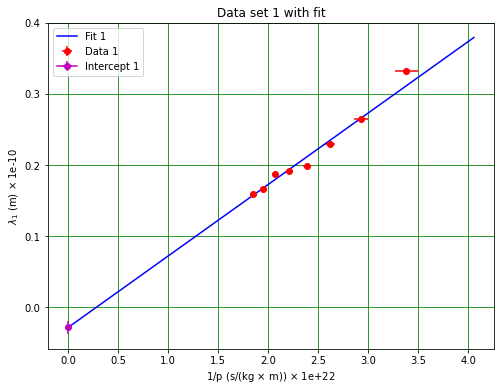

In [122]:
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitChi(p, x, y, xerr, yerr):
    '''
    Cost function
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
# Set initial values of fit parameters, run first fit
print(" ")
print("Choose appropriate scale factors for data before performing fit")
print("Max(1/p) =",np.amax(invP))
print("Max(Lambda 1) =",np.amax(Lambda1))
scaleX = 1.0e22
scaleY = 1.0e-10
print(" ")
print("Scaling factor x data",scaleX)
print("Scaling factor y data",scaleY)
print(" ")
print("Fit data set 1")
#
xData = invP/scaleX
yData = Lambda1/scaleY
xError = invPerror/scaleX
yError = Lambda1error/scaleY
#
nPoints = nLen
#
pInit = [1.0, 1.0]
out = least_squares(fitChi, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    #
    # Apply scale factors to get values of intercept and gradient in same units as input data
    cVal1 = pFinal[0]*scaleY
    mVal1 = pFinal[1]*scaleY/scaleX
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitChi(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.2f}".format(cVal))
        print("Gradient = {:5.2f}".format(mVal))
        print(" ")
        cErr1 = 0.0
        mErr1 = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        #
        # Apply scale factors to get errors of intercept and gradient in same units as input data
        cErr1 = np.sqrt(covar[0, 0])*scaleY
        mErr1 = np.sqrt(covar[1, 1])*scaleY/scaleX
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.2e} +- {:5.2e} m.".format(cVal1, cErr1))
        print("Gradient = {:5.2e} +- {:5.2e} Js.".format(mVal1, mErr1))
        print(" ")
    #
    # Calculate fitted function values
    nPlot = 2
    xPlot = np.linspace(0.0, 1.2*np.max(xData), nPlot)
    fitPlot1 = fitLine(pFinal, xPlot)
    #
    # Make plots
    fig = plt.figure(figsize = (8, 6))
    plt.title('Data set 1 with fit')
    plt.xlabel('1/p (s/(kg $\\times$ m)) $\\times$ ' + str(scaleX))
    plt.ylabel('$\\lambda_1$ (m) $\\times$ ' + str(scaleY))
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, marker = 'o', color = 'r', 
                 linestyle = '', label = "Data 1") 
    plt.errorbar(0.0, cVal1/scaleY, xerr = 0.0, yerr = cErr1/scaleY, marker = 'o', color = 'm', label = "Intercept 1") 
    plt.plot(xPlot, fitPlot1, color = 'b', linestyle = '-', label = "Fit 1")
    plt.grid(color = 'g')
    plt.legend()
    plt.show()  

 
Fit data set 2
 
Fit quality:
chisq per point = 
 [6.209e+00 1.720e-02 1.019e+01 5.305e-02 1.749e-04 8.171e-02 8.773e-02
 9.967e-01]
chisq = 17.63, chisq/NDF =  2.94.
 
Parameters returned by fit:
Intercept = -4.74e-12 +- 6.00e-13 m.
Gradient = 6.81e-34 +- 2.85e-35 Js.
 


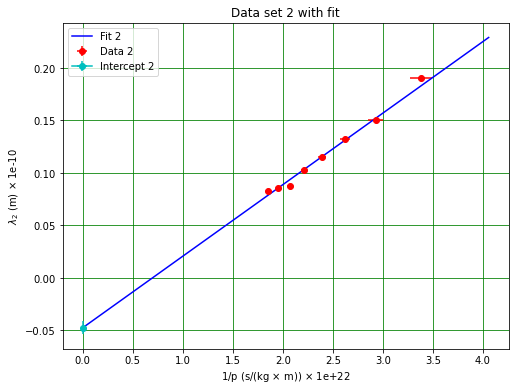

In [123]:
#
# Set initial values of fit parameters, run second fit
print(" ")
print("Fit data set 2")
#
xData2 = invP/scaleX
yData2 = Lambda2/scaleY
xError2 = invPerror/scaleX
yError2 = Lambda2error/scaleY
#
pInit = [1.0, 1.0]
out = least_squares(fitChi, pInit, args=(xData2, yData2, xError2, yError2))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    #
    # Apply scale factors to get values of intercept and gradient in same units as input data
    cVal2 = pFinal[0]*scaleY
    mVal2 = pFinal[1]*scaleY/scaleX
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitChi(pFinal, xData2, yData2, xError2, yError2)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.2e}".format(cVal))
        print("Gradient = {:5.2e}".format(mVal))
        print(" ")
        cErr2 = 0.0
        mErr2 = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        #
        # Apply scale factors to get errors of intercept and gradient in same units as input data
        cErr2 = np.sqrt(covar[0, 0])*scaleY
        mErr2 = np.sqrt(covar[1, 1])*scaleY/scaleX
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.2e} +- {:5.2e} m.".format(cVal2, cErr2))
        print("Gradient = {:5.2e} +- {:5.2e} Js.".format(mVal2, mErr2))
        print(" ")
    #
    # Calculate fitted function values
    nPlot = 2
    xPlot = np.linspace(0.0, 1.2*np.amax(xData), nPlot)
    fitPlot2 = fitLine(pFinal, xPlot)
    #
    # Make plot
    fig = plt.figure(figsize = (8, 6))
    plt.title('Data set 2 with fit')
    plt.xlabel('1/p (s/(kg $\\times$ m)) $\\times$ ' + str(scaleX))
    plt.ylabel('$\\lambda_2$ (m) $\\times$ ' + str(scaleY))
    plt.errorbar(xData2, yData2, xerr = xError2, yerr = yError2, marker = 'o', color = 'r', 
                 linestyle = '', label = "Data 2") 
    plt.errorbar(0.0, cVal2/scaleY, xerr = 0.0, yerr = cErr2/scaleY, marker = 'o', color = 'c', label = "Intercept 2") 
    plt.plot(xPlot, fitPlot2, color = 'b', linestyle = '-', label = "Fit 2")
    plt.grid(color = 'g')
    plt.legend()
    plt.show() 

 
Combined plot 
 


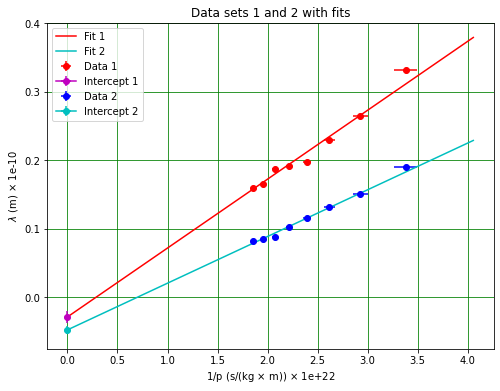

In [124]:
#
# Make combined plot
print(" ")
print("Combined plot ")
print(" ")
fig = plt.figure(figsize = (8, 6))
plt.title('Data sets 1 and 2 with fits')
plt.xlabel('1/p (s/(kg $\\times$ m)) $\\times$ ' + str(scaleX))
plt.ylabel('$\\lambda$ (m) $\\times$ ' + str(scaleY))
plt.errorbar(xData, yData, xerr = xError, yerr = yError, 
             marker = 'o', color = 'r', linestyle = '', label = "Data 1") 
plt.plot(xPlot, fitPlot1, color = 'r', linestyle = '-', label = "Fit 1")
plt.errorbar(0.0, cVal1/scaleY, xerr = 0.0, yerr = cErr1/scaleY, marker = 'o', color = 'm', label = "Intercept 1") 
plt.errorbar(xData2, yData2, xerr = xError2, yerr = yError2, 
             marker = 'o', color = 'b', linestyle = '', label = "Data 2") 
plt.errorbar(0.0, cVal2/scaleY, xerr = 0.0, yerr = cErr2/scaleY, marker = 'o', color = 'c', label = 'Intercept 2') 
plt.plot(xPlot, fitPlot2, color = 'c', linestyle = '-', label = "Fit 2")
plt.grid(color = 'g')
plt.legend()
plt.savefig('ElectronDiffractionPlot.png')
plt.show()

In [125]:
#
# Compare values from two datasets and combine if appropriate
sigC = abs(cVal1 - cVal2)/(np.sqrt(cErr1**2 + cErr2**2))
sigM = abs(mVal1 - mVal2)/(np.sqrt(mErr1**2 + mErr2**2))
#
sigTest = 5
if sigC < sigTest:
    cVal = (cVal1/cErr1**2 + cVal2/cErr2**2)/(1/cErr1**2 + 1/cErr2**2)
    cErr = 1/np.sqrt(1/cErr1**2 + 1/cErr2**2)
    print(" ")
    print("Intercept values are compatible.")
    print(f"Combined intercept {cVal:.2e} +- {cErr:.2e} m.")
    sigZero = abs(cVal/cErr)
    if sigZero < sigTest:
        print("The intercept is compatible with zero.")
    else:
        print("The intercept is not compatible with zero.")
else:
    print("Intercept values not compatible.")
#
if sigM < sigTest:
    mVal = (mVal1/mErr1**2 + mVal2/mErr2**2)/(1/mErr1**2 + 1/mErr2**2)
    mErr = 1/np.sqrt(1/mErr1**2 + 1/mErr2**2)
    print(" ")
    print("Gradient values are compatible.")
    print(f"Combined gradient {mVal:.2e} +- {mErr:.2e} Js.")
    #
    # Compare with expected value
    hBook = 6.625e-34
    sigResult = abs(hBook - mVal)/mErr
    print(f"The accepted value of Planck's constant is {hBook:.3e} Js.")
    print(f"The two values differ by {sigResult:.1f} times the measured error.")
    if sigResult < sigTest:
        print("The measurements here can be considered compatible with the standard result.")
    else:
        print("The measurements here cannot be considered compatible with the standard result.")
else:
    print("Gradient values not compatible.")


 
Intercept values are compatible.
Combined intercept -4.17e-12 +- 5.01e-13 m.
The intercept is not compatible with zero.
Gradient values not compatible.


## Results

The value of Planck's constant obtained here is $(7.8 \pm 0.5) \times 10^{-34}$ Js. This is compatible with the accepted value 
$h = 6.626 \times 10^{-34}$ Js.

## More plots

### Lines

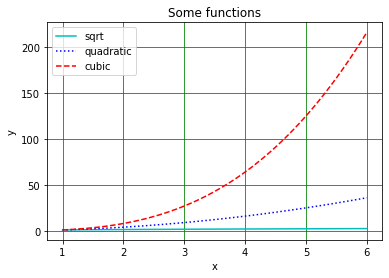

In [45]:
xArr = np.linspace(1, 6, 51)
yArr05 = np.sqrt(xArr)
yArr2 = xArr**2
yArr3 = xArr**3
plt.figure(figsize = (6, 4))
plt.title("Some functions")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr05, linestyle = '-', color = 'c', label = "sqrt")
plt.plot(xArr, yArr2, linestyle = ':', color = 'b', label = "quadratic")
plt.plot(xArr, yArr3, linestyle = '--', color = 'r', label = "cubic")
plt.legend()
plt.grid(color = 'g')
plt.show()

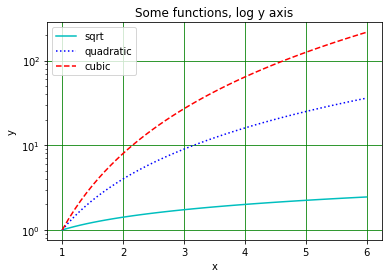

In [46]:
plt.figure(figsize = (6, 4))
plt.title("Some functions, log y axis")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr05, linestyle = '-', color = 'c', label = "sqrt")
plt.plot(xArr, yArr2, linestyle = ':', color = 'b', label = "quadratic")
plt.plot(xArr, yArr3, linestyle = '--', color = 'r', label = "cubic")
plt.yscale('log')
plt.legend()
plt.grid(color = 'g')
plt.show()

### Points with errorbars

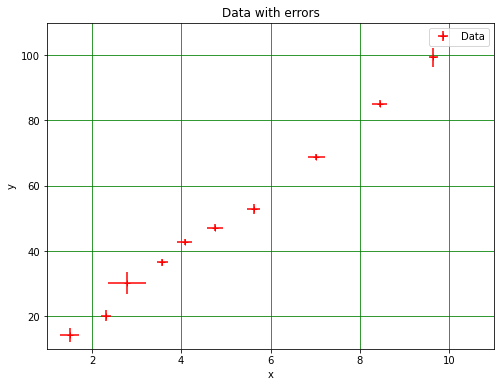

In [47]:
#
# nPoints is the number of data points
nPoints = 10
#
# Define numpy arrays, initially filled with zeros, to store x and y values
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#
# Enter the data
xData[0] = 1.50
xData[1] = 2.31
xData[2] = 2.78
xData[3] = 3.58
xData[4] = 4.08
xData[5] = 4.76
xData[6] = 5.62
xData[7] = 7.02
xData[8] = 8.45
xData[9] = 9.65
#
yData[0] = 14.3
yData[1] = 20.2
yData[2] = 30.1
yData[3] = 36.5
yData[4] = 42.7
yData[5] = 47.1
yData[6] = 52.9
yData[7] = 68.8
yData[8] = 85.2
yData[9] = 99.4
#
# Enter the errors
xError[0] = 0.21
xError[1] = 0.11
xError[2] = 0.43
xError[3] = 0.13
xError[4] = 0.17
xError[5] = 0.18
xError[6] = 0.15
xError[7] = 0.19
xError[8] = 0.17
xError[9] = 0.11
#
yError[0] = 2.1
yError[1] = 1.7
yError[2] = 3.3
yError[3] = 1.1
yError[4] = 0.9
yError[5] = 1.1
yError[6] = 1.5
yError[7] = 0.9
yError[8] = 1.2
yError[9] = 2.9
#
# Plot data
fig = plt.figure(figsize = (8, 6))
plt.title('Data with errors')
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', 
             marker = '+', linestyle = '', label = "Data") 
plt.xlim(1.0, 11.0)
plt.ylim(10.0, 110.0)
plt.grid(color = 'g')
plt.legend()
plt.savefig("ErrorBarPlot.png")
plt.show()

### Histograms (with mean and standard deviation)

A histogram shows the frequency with which values occur in a dataset. The data are split into "bins", the lower and upper limits of which are indicated by the edges of the bars in the plot. The area of each of the bars is proportional to the number of data points that fall within the bin. (Most histograms use bins of equal width, in which case the height of the bin indicates the number of entries it contains.) Here, a histogram is plotted using defined, rather than accepting those calculated by matplotlib. (A complete description of `plt.hist` is provided [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).)

The mean and standard deviation of the distribution are also calculated and displayed on the plot.

 
gaussArr
 [ 3.501  5.479  6.768  5.229  3.83  10.654  6.862  6.865  4.04   4.736
  7.155  5.75   7.958  9.19   3.596  3.247  8.109  5.922  7.361  8.658
  8.567  2.483  7.229  9.033  5.608  4.366  4.108  6.441  4.799  5.695
  3.625  6.598  4.104  2.313  7.621  4.495  5.127  6.095  5.498  6.334
  7.331  9.394  8.107  6.585  4.351  6.202  6.497  9.431  5.245  1.803
  4.794  4.962  1.575  5.188  5.407  6.543  5.082  6.928  3.945  6.345
  7.187  5.384  4.153  4.594  8.027  9.057  7.052  9.378  6.025  7.681
  5.818  8.064  6.968  5.22   5.796  9.695  7.349  3.214  4.842  5.503
  4.954  6.94   4.159  5.94   6.163  8.071  3.523  5.809  2.616  7.319
  6.732  6.121  7.118  2.56   6.821  4.766  9.242  6.503  9.556  9.467
  5.061  4.749  4.759  6.978  9.18   4.651  5.62   2.469  8.745  6.662
 12.211  4.865  5.729  4.675  6.623  5.843  8.017  5.903  5.347  4.104
  5.465  4.441  5.358  4.93   7.49   8.439  4.319  7.216  6.859  3.971
  3.705  9.736  8.673  2.48   4.591  6.99   5.839  3.619  6.939  

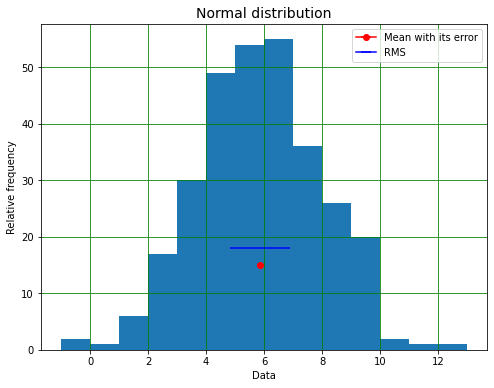

In [48]:
#
# Read in an array
gaussArr = np.loadtxt("normDistArr.csv")
print(" ")
print("gaussArr\n",gaussArr)
#
binBot = -1.0
binTop = 13.0
binNumber = 14
binEdges = np.linspace(binBot, binTop, binNumber + 1)
binWidth = (binTop - binBot)/binNumber
print(" ")
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
nEvents = len(gaussArr) # determine length of gaussArr
mu = np.mean(gaussArr) # calculate arithmetic mean of numbers in array
sigma = np.std(gaussArr) # calculate standard deviation (error on single value)
muError = sigma/np.sqrt(nEvents) # calculate error of mean
yMu = nEvents/20
ySigma = 1.2*nEvents/20
#
plt.figure(figsize = (8, 6))
plt.title('Normal distribution', fontsize = 14)
plt.xlabel('Data')
plt.ylabel('Relative frequency')
plt.hist(gaussArr, bins = binEdges)
plt.errorbar(mu, yMu, xerr = muError, marker = 'o', color = 'r', 
             label = 'Mean with its error')
plt.errorbar(mu, ySigma, xerr = sigma/2, marker = '', color = 'b', label = 'RMS')
plt.grid(color = 'g')
plt.legend()
plt.show()

### Multiple plots in one figure

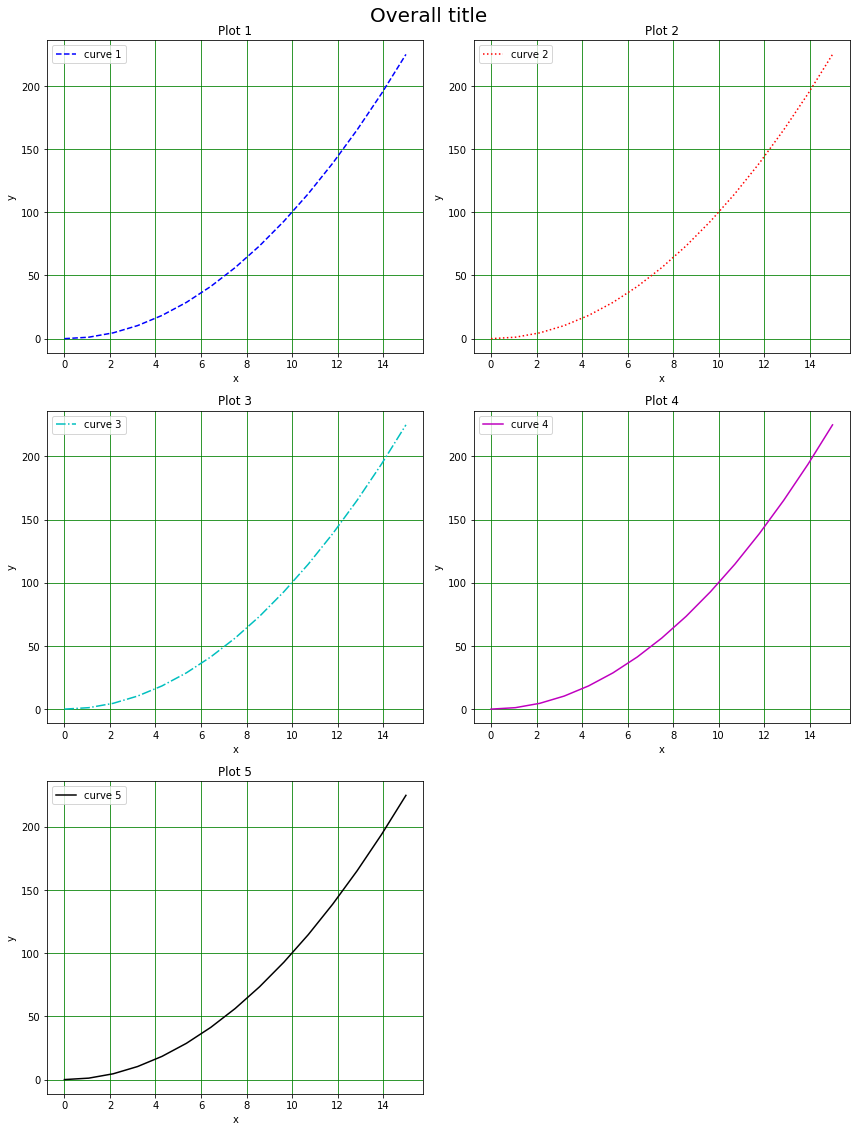

In [49]:
xArr = np.linspace(0, 15, 15)
yArr = xArr**2
#
fig = plt.figure(figsize = (12, 16)) # opens a figure 
fig.suptitle('Overall title', fontsize=20) # overall title
#
plt.subplot(3, 2, 1) # creates 3 row, 2 column grid, starts in top left square 
plt.title("Plot 1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'curve 1')
plt.legend()
plt.grid(color = 'g')
#
plt.subplot(3, 2, 2) # second square, reading from left to right, top to bottom
plt.title("Plot 2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, linestyle = ':', color = 'r', label = 'curve 2')
plt.grid(color = 'g')
plt.legend()
#
plt.subplot(3, 2, 3) # plot in third square
plt.title("Plot 3")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, linestyle = '-.', color = 'c', label = 'curve 3')
plt.grid(color = 'g')
plt.legend()
#
plt.subplot(3, 2, 4) # plot in fourth square
plt.title("Plot 4")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, linestyle = '-', color = 'm', label = 'curve 4')
plt.grid(color = 'g')
plt.legend()
#
plt.subplot(3, 2, 5) # plot in fifth square
plt.title("Plot 5")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, linestyle = '-', color = 'k', label = 'curve 5')
plt.grid(color = 'g')
plt.legend()
#
plt.tight_layout()
plt.show()